<a href="https://colab.research.google.com/github/ricky-kiva/dl-deep-tf-cnn/blob/main/2_a1_augmented_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12.5K Samples Cats vs Dogs with Augmented Data

Import libraries

In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Download dataset

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

--2023-09-21 04:55:11--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.252.210, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.252.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   121MB/s    in 6.1s    

2023-09-21 04:55:18 (128 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



Unzip dataset

In [ ]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Referencing source path

In [ ]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

Delete non-image files

In [ ]:
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

Data exploration: number of samples

In [ ]:
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

Create training & validation directory

In [ ]:
root_dir = '/tmp/cats-v-dogs'

# prevent FileExistsError in case this cell is being run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')

  os.makedirs(train_dir)
  os.makedirs(validation_dir)

  os.makedirs(os.path.join(train_dir, 'cats'))
  os.makedirs(os.path.join(train_dir, 'dogs'))

  os.makedirs(os.path.join(validation_dir, 'cats'))
  os.makedirs(os.path.join(validation_dir, 'dogs'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

Check directory that has been made (inside *root_dir*)

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs


Make function to split training & validation data

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  list_dir = os.listdir(SOURCE_DIR)

  non_zero_files = []

  for fname in list_dir:
    file_path = os.path.join(SOURCE_DIR, fname)
    if os.path.isfile(file_path):
      if os.path.getsize(file_path) != 0:
        non_zero_files.append(fname)
      else:
        print(f'{fname} is zero length, so ignoring.')

  split_index = int(SPLIT_SIZE * len(non_zero_files))

  train_files, validation_files = non_zero_files[:split_index], non_zero_files[split_index:]

  for fname in train_files:
    source_path = os.path.join(SOURCE_DIR, fname)
    destination_path = os.path.join(TRAINING_DIR, fname)
    copyfile(source_path, destination_path)

  for fname in validation_files:
    source_path = os.path.join(SOURCE_DIR, fname)
    destination_path = os.path.join(VALIDATION_DIR, fname)
    copyfile(source_path, destination_path)

Split the data

In [ ]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# empty directories in case this cell is being run several times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


Make function to generate *image generators* for both training & validation data

In [ ]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=(1./255.),
                                     rotation_range=90,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=(1./255.))

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

Call the train_val_generators function

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Create the model

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

Train the model

In [ ]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
176/176 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5267

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


176/176 [==============================] - 178s 934ms/step - loss: 0.6889 - accuracy: 0.5267 - val_loss: 0.6681 - val_accuracy: 0.5924
Epoch 2/15
176/176 [==============================] - 162s 920ms/step - loss: 0.6478 - accuracy: 0.6239 - val_loss: 0.6030 - val_accuracy: 0.6884
Epoch 3/15
176/176 [==============================] - 162s 921ms/step - loss: 0.6115 - accuracy: 0.6664 - val_loss: 0.6003 - val_accuracy: 0.6648
Epoch 4/15
176/176 [==============================] - 162s 919ms/step - loss: 0.5796 - accuracy: 0.6968 - val_loss: 0.5543 - val_accuracy: 0.7216
Epoch 5/15
176/176 [==============================] - 161s 914ms/step - loss: 0.5513 - accuracy: 0.7184 - val_loss: 0.5204 - val_accuracy: 0.7488
Epoch 6/15
176/176 [==============================] - 160s 911ms/step - loss: 0.5245 - accuracy: 0.7419 - val_loss: 0.5135 - val_accuracy: 0.7588
Epoch 7/15
176/176 [==============================] - 160s 911ms/step - loss: 0.5007 - accuracy: 0.7542 - val_loss: 0.4552 - val_accura

Plot loss & accuracy

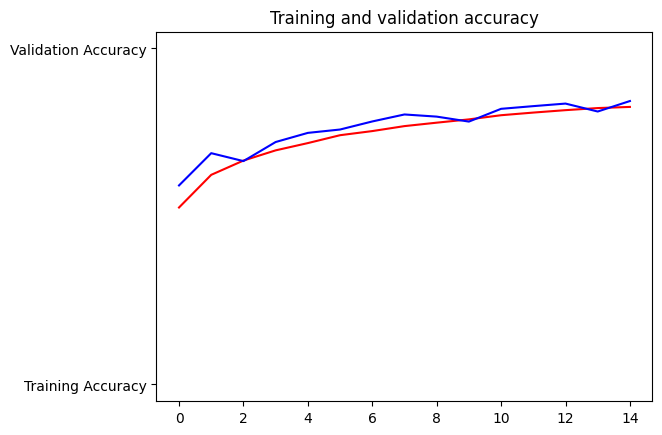

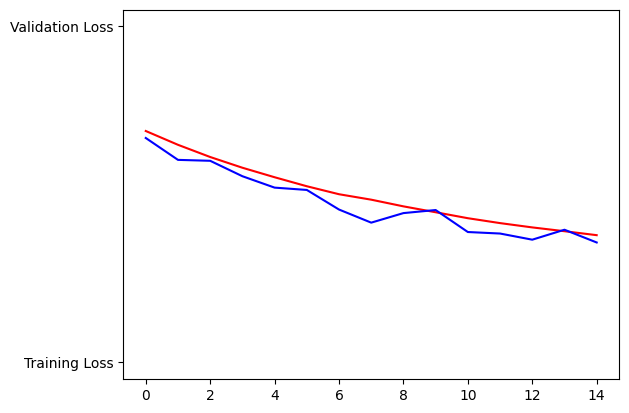

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

**Result:** Good, just need to improve the accuracy & loss